<a href="https://colab.research.google.com/github/cdelcristo/BD101/blob/master/Assignment-8r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
def accuracyFunc(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x),average='micro')
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    return 1

In [0]:
#import dataset
data = pd.read_csv('https://raw.githubusercontent.com/cdelcristo/BD101/master/Data.csv')

In [4]:
data.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,...,fea.218,fea.219,fea.220,fea.221,fea.222,fea.223,fea.224,fea.225,fea.226,fea.227,fea.228,fea.229,fea.230,fea.231,fea.232,fea.233,fea.234,fea.235,fea.236,fea.237,fea.238,fea.239,fea.240,fea.241,fea.242,fea.243,fea.244,fea.245,fea.246,fea.247,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
0,1,-1.000000,-0.999977,-0.998420,-0.969256,-0.774192,-0.275283,0.034194,-0.399883,-0.815319,-0.955680,-0.989120,-0.997870,-0.999813,-0.999987,-0.999999,-1.0,-0.999996,-0.999617,-0.987214,-0.844745,-0.336824,0.331032,0.504431,0.130807,-0.319797,-0.623297,-0.835472,-0.953923,-0.991618,-0.998847,-0.999913,-0.999997,-0.999941,-0.995977,-0.926503,-0.533181,0.235636,0.540066,0.227344,...,-0.167569,0.195612,0.505857,0.495046,-0.000957,-0.668797,-0.956051,-0.870433,-0.438388,0.101748,0.339861,0.368924,0.320216,0.299545,0.335422,0.440739,0.518921,0.522361,0.366751,-0.082735,-0.613735,-0.917818,-0.993789,-0.978718,-0.865636,-0.579124,-0.183571,0.170864,0.365778,0.414430,0.427150,0.404087,0.213519,-0.104366,-0.444652,-0.740973,-0.931514,-0.992336,-0.99966,0
1,2,-1.000000,-0.999998,-0.999760,-0.992020,-0.901515,-0.545999,0.030940,0.411866,0.390567,0.008434,-0.502208,-0.871346,-0.987343,-0.999525,-0.999995,-1.0,-1.000000,-0.999975,-0.997706,-0.952953,-0.659959,0.035736,0.653449,0.839105,0.688151,0.494709,0.140118,-0.540025,-0.921626,-0.995304,-0.999915,-0.999999,-0.999999,-0.999844,-0.989950,-0.841139,-0.264202,0.538892,0.875908,...,0.763248,0.518896,-0.221164,-0.808547,-0.982445,-0.999393,-0.999994,-0.999997,-0.999665,-0.988924,-0.866280,-0.422491,0.192044,0.536542,0.725941,0.816046,0.611095,0.013770,-0.672177,-0.956167,-0.997604,-0.999952,-1.000000,-1.000000,-0.999978,-0.998806,-0.979200,-0.858993,-0.527557,-0.043773,0.358344,0.374951,-0.040142,-0.586220,-0.911391,-0.993541,-0.999839,-0.999998,-1.00000,0
2,3,-0.999999,-0.999970,-0.999545,-0.995613,-0.961828,-0.717215,-0.144694,0.092191,-0.260683,-0.687438,-0.925676,-0.992556,-0.999656,-0.999992,-1.000000,-1.0,-0.999915,-0.998355,-0.986465,-0.932243,-0.783630,-0.349874,0.450019,0.764206,0.530335,-0.029652,-0.631342,-0.926437,-0.992770,-0.999687,-0.999995,-1.000000,-0.997946,-0.972186,-0.846746,-0.556388,-0.200933,0.200376,0.756242,...,0.907398,0.713256,0.051250,-0.718346,-0.981114,-0.999713,-0.999999,-0.999471,-0.987096,-0.874182,-0.482285,0.110328,0.541402,0.769359,0.897794,0.875293,0.670917,0.208939,-0.459925,-0.888110,-0.993404,-0.999925,-1.000000,-0.999978,-0.999127,-0.985692,-0.894444,-0.636530,-0.257442,0.153603,0.414912,0.334299,-0.060454,-0.541605,-0.867137,-0.981191,-0.999056,-0.999990,-1.00000,0
3,4,-1.000000,-1.000000,-0.999878,-0.989419,-0.832602,-0.368054,-0.080497,-0.246663,-0.263954,-0.317376,-0.699568,-0.947379,-0.997132,-0.999968,-1.000000,-1.0,-1.000000,-1.000000,-0.999915,-0.992487,-0.873086,-0.403134,0.222510,0.448349,0.516625,0.364233,-0.333441,-0.861626,-0.991888,-0.999908,-1.000000,-1.000000,-1.000000,-1.000000,-0.999980,-0.998101,-0.960678,-0.708190,-0.038261,...,0.441463,0.749417,0.376856,-0.547731,-0.953210,-0.998266,-0.999983,-0.999999,-0.999753,-0.985541,-0.787279,-0.161113,0.451871,0.598882,0.585579,0.690706,0.788175,0.632486,0.047866,-0.706772,-0.978769,-0.999585,-0.999997,-1.000000,-0.999961,-0.996766,-0.942932,-0.684969,-0.164910,0.306974,0.480128,0.487418,0.356270,-0.015310,-0.530088,-0.893466,-0.993412,-0.999916,-1.00000,0
4,5,-1.000000,-1.000000,-0.999999,-0.999821,-0.988678,-0.829627,-0.330878,0.013998,-0.345315,-0.803120,-0.973332,-0.998694,-0.999985,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-0.999992,-0.999126,-0.970712,-0.667495,0.090387,0.504988,0.267632,-0.399843,-0.870560,-0.991509,-0.999848,-0.999999,-1.000000,-1.000000,-1.000000,-1.000000,-0.999973,-0.99743

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 258 entries, Unnamed: 0 to gnd
dtypes: float64(256), int64(2)
memory usage: 1.6 MB


In [6]:
data.shape

(800, 258)

In [7]:
data.describe()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,...,fea.218,fea.219,fea.220,fea.221,fea.222,fea.223,fea.224,fea.225,fea.226,fea.227,fea.228,fea.229,fea.230,fea.231,fea.232,fea.233,fea.234,fea.235,fea.236,fea.237,fea.238,fea.239,fea.240,fea.241,fea.242,fea.243,fea.244,fea.245,fea.246,fea.247,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,-0.991409,-0.968831,-0.917406,-0.820467,-0.676586,-0.495195,-0.266342,-0.080204,-0.153667,-0.420881,-0.660945,-0.825934,-0.928209,-0.977699,-0.995094,-0.999348,-0.980254,-0.929707,-0.820599,-0.639007,-0.408701,-0.163070,0.109668,0.335861,0.277382,-0.025860,-0.331556,-0.591104,-0.798240,-0.926586,-0.981495,-0.997136,-0.971709,-0.900847,-0.755182,-0.539165,-0.307375,-0.111333,0.089210,...,0.056870,-0.063594,-0.168064,-0.347743,-0.574640,-0.773516,-0.913494,-0.932308,-0.811953,-0.628396,-0.407897,-0.206957,-0.054727,0.115569,0.288908,0.263216,0.023927,-0.218117,-0.412615,-0.594451,-0.751043,-0.866681,-0.946702,-0.974289,-0.923923,-0.836240,-0.709612,-0.558863,-0.409727,-0.252609,-0.108339,-0.139846,-0.371067,-0.597333,-0.743848,-0.838149,-0.901319,-0.945590,-0.977662,1.500000
std,231.0844,0.047754,0.118036,0.207387,0.309470,0.411327,0.467895,0.448563,0.419555,0.429422,0.444938,0.400237,0.293389,0.175666,0.085924,0.032297,0.006914,0.089918,0.205899,0.345321,0.486420,0.589208,0.617244,0.530629,0.458274,0.473299,0.553843,0.597353,0.513897,0.358736,0.198019,0.080840,0.018748,0.110928,0.244428,0.401942,0.535619,0.615590,0.628328,0.532742,...,0.535597,0.652323,0.672166,0.617831,0.523431,0.388012,0.203777,0.181612,0.352864,0.487852,0.574341,0.634901,0.643903,0.551151,0.513794,0.535642,0.576824,0.627360,0.587589,0.504193,0.407889,0.301429,0.162811,0.094546,0.194439,0.294750,0.386739,0.463040,0.505522,0.487545,0.467927,0.478690,0.457282,0.420004,0.352270,0.289812,0.231492,0.166216,0.088638,1.118733
min,1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999990,-0.999939,-0.999845,...,-0.999885,-0.999990,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,200.7500,-1.000000,-1.000000,-1.000000,-0.999894,-0.993603,-0.931390,-0.650476,-0.281855,-0.429037,-0.812446,-0.978264,-0.998866,-0.999985,-1.000000,-1.000000,-1.000000,-1.000000,-1.

In [8]:
data.gnd.value_counts()

3    200
2    200
1    200
0    200
Name: gnd, dtype: int64

In [9]:
dataFeatures = data.drop(['gnd','Unnamed: 0'] , axis=1)
dataFeatures.head(2)

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,fea.11,fea.12,fea.13,fea.14,fea.15,fea.16,fea.17,fea.18,fea.19,fea.20,fea.21,fea.22,fea.23,fea.24,fea.25,fea.26,fea.27,fea.28,fea.29,fea.30,fea.31,fea.32,fea.33,fea.34,fea.35,fea.36,fea.37,fea.38,fea.39,fea.40,...,fea.217,fea.218,fea.219,fea.220,fea.221,fea.222,fea.223,fea.224,fea.225,fea.226,fea.227,fea.228,fea.229,fea.230,fea.231,fea.232,fea.233,fea.234,fea.235,fea.236,fea.237,fea.238,fea.239,fea.240,fea.241,fea.242,fea.243,fea.244,fea.245,fea.246,fea.247,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256
0,-1.0,-0.999977,-0.99842,-0.969256,-0.774192,-0.275283,0.034194,-0.399883,-0.815319,-0.955680,-0.989120,-0.997870,-0.999813,-0.999987,-0.999999,-1.0,-0.999996,-0.999617,-0.987214,-0.844745,-0.336824,0.331032,0.504431,0.130807,-0.319797,-0.623297,-0.835472,-0.953923,-0.991618,-0.998847,-0.999913,-0.999997,-0.999941,-0.995977,-0.926503,-0.533181,0.235636,0.540066,0.227344,0.115314,...,-0.450183,-0.167569,0.195612,0.505857,0.495046,-0.000957,-0.668797,-0.956051,-0.870433,-0.438388,0.101748,0.339861,0.368924,0.320216,0.299545,0.335422,0.440739,0.518921,0.522361,0.366751,-0.082735,-0.613735,-0.917818,-0.993789,-0.978718,-0.865636,-0.579124,-0.183571,0.170864,0.365778,0.414430,0.427150,0.404087,0.213519,-0.104366,-0.444652,-0.740973,-0.931514,-0.992336,-0.99966
1,-1.0,-0.999998,-0.99976,-0.992020,-0.901515,-0.545999,0.030940,0.411866,0.390567,0.008434,-0.502208,-0.871346,-0.987343,-0.999525,-0.999995,-1.0,-1.000000,-0.999975,-0.997706,-0.952953,-0.659959,0.035736,0.653449,0.839105,0.688151,0.494709,0.140118,-0.540025,-0.921626,-0.995304,-0.999915,-0.999999,-0.999999,-0.999844,-0.989950,-0.841139,-0.264202,0.538892,0.875908,0.656325,...,0.563992,0.763248,0.518896,-0.221164,-0.808547,-0.982445,-0.999393,-0.999994,-0.999997,-0.999665,-0.988924,-0.866280,-0.422491,0.192044,0.536542,0.725941,0.816046,0.611095,0.013770,-0.672177,-0.956167,-0.997604,-0.999952,-1.000000,-1.000000,-0.999978,-0.998806,-0.979200,-0.858993,-0.527557,-0.043773,0.358344,0.374951,-0.040142,-0.586220,-0.911391,-0.993541,-0.999839,-0.999998,-1.00000


In [10]:
dataY = data.gnd
dataY.shape

(800,)

In [11]:
dataFeatures.shape

(800, 256)

In [12]:
dataY.shape

(800,)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dataFeatures, dataY, test_size=0.33, random_state=14)

In [0]:
lr = LogisticRegression(solver='lbfgs',multi_class='auto', max_iter=500)
lr_baseLine = lr.fit(x_train,y_train)

In [15]:
accuracyFunc(lr_baseLine,x_test,y_test)

Accuracy is:  0.9848484848484849
F1 score is:  0.9848484848484849


1

In [0]:
rfe = RFE(estimator=lr, step=1)
rfe = rfe.fit(x_train, y_train)

In [17]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking').transpose()

,247,102,103,104,105,106,107,179,178,110,177,113,114,115,116,117,101,118,100,98,188,248,82,166,84,85,86,87,88,90,184,183,182,181,97,99,249,119,121,148,...,91,223,95,49,6,51,1,76,65,46,32,239,224,254,80,242,214,30,16,50,93,241,61,48,62,78,3,134,92,64,14,240,255,0,63,47,79,77,31,15
Feature,fea.248,fea.103,fea.104,fea.105,fea.106,fea.107,fea.108,fea.180,fea.179,fea.111,fea.178,fea.114,fea.115,fea.116,fea.117,fea.118,fea.102,fea.119,fea.101,fea.99,fea.189,fea.249,fea.83,fea.167,fea.85,fea.86,fea.87,fea.88,fea.89,fea.91,fea.185,fea.184,fea.183,fea.182,fea.98,fea.100,fea.250,fea.120,fea.122,fea.149,...,fea.92,fea.224,fea.96,fea.50,fea.7,fea.52,fea.2,fea.77,fea.66,fea.47,fea.33,fea.240,fea.225,fea.255,fea.81,fea.243,fea.215,fea.31,fea.17,fea.51,fea.94,fea.242,fea.62,fea.49,fea.63,fea.79,fea.4,fea.135,fea.93,fea.65,fea.15,fea.241,fea.256,fea.1,fea.64,fea.48,fea.80,fea.78,fea.32,fea.16
Ranking,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129


In [0]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [19]:
x_train_rfe.shape

(536, 128)

In [20]:
x_test_rfe.shape

(264, 128)

In [0]:
lr_rfe = lr.fit(x_train_rfe,y_train)

In [22]:
accuracyFunc(lr_rfe, x_test_rfe, y_test)

Accuracy is:  0.9848484848484849
F1 score is:  0.9848484848484849


1

Apply PSA to Data

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [0]:
dataFeaturesEst = StandardScaler().fit_transform(dataFeatures)

In [0]:
pca = PCA(n_components=2)

In [0]:
principalCompo = pca.fit_transform(dataFeaturesEst)

In [27]:
prinCompDf = pd.DataFrame(data=principalCompo,columns= ['PC1' , ("PC2")])
prinCompDf.head()

,PC1,PC2
0,9.124285,5.852378
1,2.708190,-1.088787
2,9.820060,4.556152
3,-2.510460,-3.207957
4,-6.504475,0.295881


In [28]:
prinCompDf.shape

(800, 2)

In [29]:
y = data.loc[:,['gnd']].values
y.shape

(800, 1)

In [30]:
PCAFinalDF = pd.concat([prinCompDf, data[['gnd']]], axis = 1)
PCAFinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
PC1    800 non-null float64
PC2    800 non-null float64
gnd    800 non-null int64
dtypes: float64(2), int64(1)
memory usage: 18.8 KB


In [31]:
PCAFinalDF.head()

,PC1,PC2,gnd
0,9.124285,5.852378,0
1,2.708190,-1.088787,0
2,9.820060,4.556152,0
3,-2.510460,-3.207957,0
4,-6.504475,0.295881,0


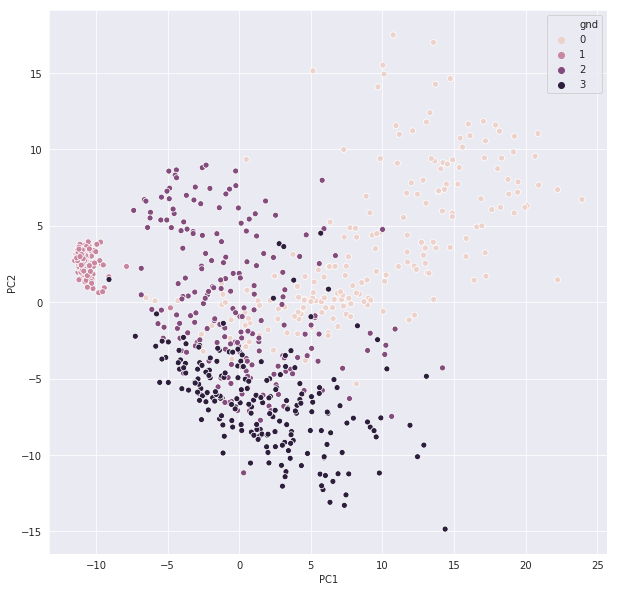

In [32]:
plt.figure(figsize=(10, 10))
sns.scatterplot(PCAFinalDF['PC1'],PCAFinalDF['PC2'] , hue=PCAFinalDF['gnd'] )

In [0]:
pca25 = PCA(n_components=25)

In [0]:
principalCompo25 = pca25.fit_transform(dataFeaturesEst)

In [47]:
principalCompo25

SyntaxError: ignored

In [57]:
prinComp25Df = pd.DataFrame(data=principalCompo25)
prinComp25Df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,9.124285,5.852378,-1.271037,3.970377,-6.295122,-0.762493,-5.996321,1.068300,-0.122178,0.434770,-0.217390,-2.285501,1.989709,2.193716,-1.839245,1.164270,-0.361901,-0.933010,0.743210,0.981247,0.253481,-1.351905,0.282621,0.693756,0.372848
1,2.708190,-1.088787,-2.156574,-10.158424,1.517791,-0.228136,3.920148,-2.659024,3.122717,-2.772015,0.387678,0.938625,0.486015,-0.611542,0.840656,-3.138619,0.038580,-2.174306,1.145048,-2.441280,-1.861725,-1.181578,-0.125310,0.956913,1.848509
2,9.820060,4.556153,-3.043195,-8.722454,4.411870,-1.460495,-0.247211,-1.701410,-1.158258,2.875725,-0.908140,-0.065397,1.894548,1.147816,-3.071596,-0.003680,3.155504,4.842568,-0.065627,-0.109063,0.868723,-0.283111,3.193753,1.414034,1.251763
3,-2.510460,-3.207956,-2.945316,-6.479732,2.221121,1.767850,1.413427,3.285341,-0.842230,-1.168358,2.307075,5.601051,0.117299,0.738979,-0.809419,1.395264,-1.146811,-1.067456,0.257183,-2.190810,-1.673604,-0.678564,0.623233,-1.982161,1.514175
4,-6.504475,0.295882,-1.358744,-3.231638,0.559081,-0.050649,1.724452,-0.357543,-0.389697,-0.029335,0.531483,3.009387,1.399293,0.732323,-0.832973,-1.087205,0.876828,-1.548249,1.384985,-2.000496,-1.064612,-2.259594,-0.285335,1.658828,1.166419


In [0]:
prinComp25Df = prinComp25Df.loc[:,[20 , 21]].values
prinComp25Df = pd.DataFrame(data=prinComp25Df)

In [59]:
prinComp25Df.head()

,0,1
0,0.253481,-1.351905
1,-1.861725,-1.181578
2,0.868723,-0.283111
3,-1.673604,-0.678564
4,-1.064612,-2.259594


In [60]:
PCAFinal25DF = pd.concat([prinComp25Df, data[['gnd']]], axis = 1)
PCAFinal25DF.head()

,0,1,gnd
0,0.253481,-1.351905,0
1,-1.861725,-1.181578,0
2,0.868723,-0.283111,0
3,-1.673604,-0.678564,0
4,-1.064612,-2.259594,0


In [0]:
PCAFinal25DF = PCAFinal25DF.rename(columns={0: "PC21", 1: "PC22"})

In [67]:
PCAFinal25DF.head()

,PC21,PC22,gnd
0,0.253481,-1.351905,0
1,-1.861725,-1.181578,0
2,0.868723,-0.283111,0
3,-1.673604,-0.678564,0
4,-1.064612,-2.259594,0


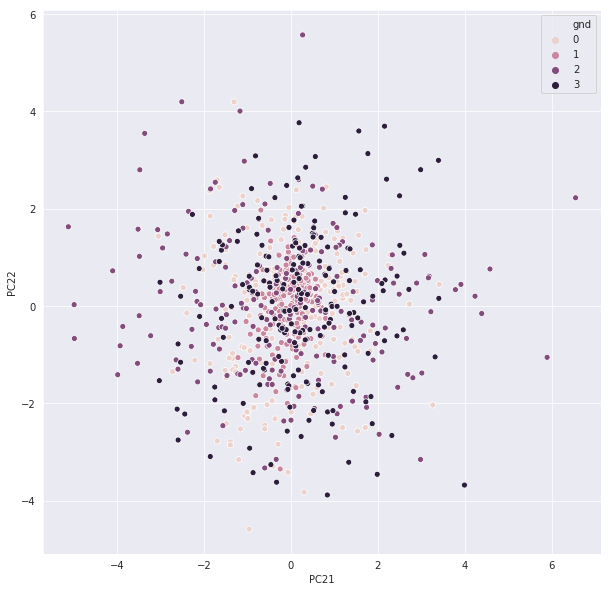

In [69]:
plt.figure(figsize=(10, 10))
sns.scatterplot(PCAFinal25DF['PC21'],PCAFinal25DF['PC22'] , hue=PCAFinal25DF['gnd'] )